<a href="https://colab.research.google.com/github/surya4331/surya4331-Capstone_Project_IPL_T20_Analysis/blob/main/EDA_IPLT20_Surya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>


#**IPL ANALYSIS**
This is IPL's data containing 3 datasets - one gives details about the matches and   2nd one about delivers of the league from(2008-2018), 3rd onegives info about teams. Here we try to get an overview of IPL in terms of teams, venues, matches, batsmen and bowlers.

# Importing and summary of dataset

In [ ]:
# Mount google colab with google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import the dataset and libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Project/IPL T20 - EDA/matches.csv')

In [ ]:
#applying Info, describe, shape and Null values
df.head(1)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [ ]:
df.tail(2) 

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [ ]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
df.shape

(756, 18)

In [ ]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

#Data Cleaning

In [ ]:
#From above info we observed that there is few Null values in city,winner,umpire1,umpire2,umpire3,player_of_match.
#Lets find no of count of null values'''
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
#umprire3 is having more null and its not required in data.Hence we remove the umpire3 column

df.drop('umpire3', axis =1, inplace  =True)

In [ ]:
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [ ]:
df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [ ]:
#more repeating city is mumbai filling null with mumbai

df['city'].mode() 

0    Mumbai
dtype: object

In [ ]:
df['city'].fillna('Mumbai',inplace = True)
df['city'].isnull().sum()

0

In [ ]:
df['city'].value_counts()

Mumbai            108
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
#from above city we observed bengaluru and bangalore are in different string lest make it same,so replacing it with Bangalore


df.replace(to_replace = 'Bengaluru', value = 'Bangalore', inplace = True)

In [ ]:
df['city'].value_counts()

Mumbai            108
Bangalore          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Cuttack             7
Ranchi              7
Abu Dhabi           7
Port Elizabeth      7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [ ]:
df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [ ]:
#from above city we observed Rising Pune Supergiant and Rising Pune Supergiants are in different string 
#lets make it same,so replacing it with Rising Pune Supergiants

df.replace(to_replace = 'Rising Pune Supergiant', value = 'Rising Pune Supergiants', inplace = True)
df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Rising Pune Supergiants         15
Gujarat Lions                   14
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64

In [ ]:
df['team2'].value_counts()

Kolkata Knight Riders          95
Royal Challengers Bangalore    95
Delhi Daredevils               89
Mumbai Indians                 86
Kings XI Punjab                85
Rajasthan Royals               80
Chennai Super Kings            75
Sunrisers Hyderabad            45
Deccan Chargers                32
Pune Warriors                  26
Gujarat Lions                  16
Rising Pune Supergiants        15
Delhi Capitals                 10
Kochi Tuskers Kerala            7
Name: team2, dtype: int64

In [ ]:
#total IPL season occured
ipl_seasons = df['Season'].unique()
ipl_seasons.sort()
ipl_seasons

array(['IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011', 'IPL-2012',
       'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016', 'IPL-2017',
       'IPL-2018', 'IPL-2019'], dtype=object)

#Objective 1: 

Toss decision percentage opted by team for entire IPL League

In [ ]:
toss_decision = df['toss_decision'].value_counts().reset_index()
toss_decision

,index,toss_decision
0,field,463
1,bat,293


In [ ]:
Total_matches = toss_decision['toss_decision'].sum()
Total_matches

756

In [ ]:
field_precentage  =float((toss_decision.loc[toss_decision['index'] == 'field','toss_decision']/Total_matches)*100)

In [ ]:
bat_precentage  =float((toss_decision.loc[toss_decision['index'] == 'bat','toss_decision']/Total_matches)*100)

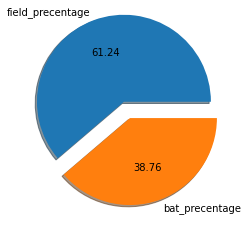

In [ ]:
toss_decision_value = np.array([field_precentage,bat_precentage])

mylabel1 = ['field_precentage','bat_precentage']

#plt.pie(y, labels = mylabels)
myexplode = [0.2, 0]

plt.pie(toss_decision_value, labels = mylabel1, explode = myexplode, shadow = True,autopct='%.2f')
#plt.legend(title = "Toss_decision percentage",loc="best", fontsize=10)
plt.show()


###Conclusion:
  The team who won the toss and opted for fielding had won the maximum number of matches in IPL T20 i.e 61.24%

#Objective 2:
 Match won by winning the toss and opted for field and bat:
 1. Match won by winning the toss opt for field.
 2. Match won by winning the toss opt for bat.
 

### 2.1 - Match Won by winning the toss opt for field

In [ ]:
#creating the new dataframe from  matches dataset.
toss = df[['team1','team2','toss_winner','toss_decision','winner']]  
toss

,team1,team2,toss_winner,toss_decision,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore
...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings


In [ ]:
toss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    object
 1   team2          756 non-null    object
 2   toss_winner    756 non-null    object
 3   toss_decision  756 non-null    object
 4   winner         752 non-null    object
dtypes: object(5)
memory usage: 29.7+ KB


In [ ]:
toss.isnull().sum()


team1            0
team2            0
toss_winner      0
toss_decision    0
winner           4
dtype: int64

In [ ]:
#winner is having 4 null values as we can option for dropping the winner which had null
toss_new = toss.dropna()
toss_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 755
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          752 non-null    object
 1   team2          752 non-null    object
 2   toss_winner    752 non-null    object
 3   toss_decision  752 non-null    object
 4   winner         752 non-null    object
dtypes: object(5)
memory usage: 35.2+ KB


In [ ]:
#Number of matches won toss and opted for field
toss_field=toss_new[toss_new['toss_decision']=='field']
toss_field
won_toss_field = len(toss_field)
won_toss_field

460

In [ ]:
#Number of won matches and also won the toss and choosed to field.

winners_f=toss_n[toss_n['toss_winner']==toss_n['winner']]
winners_f

,team1,team2,toss_winner,toss_decision,winner
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad
6,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
...,...,...,...,...,...
749,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore
750,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,Delhi Capitals


In [ ]:
#logic for filtering the toss winner with winner of the match who choosed for field
winners_f=toss_field[toss_field['toss_winner']==toss_field['winner']]
won_toss_field_win = len(winners_f)
won_toss_field_win

259

In [ ]:
won_toss_field_lost = won_toss_field - won_toss_field_win
won_toss_field_lost

201

In [ ]:
won_toss_fielding = ['won_toss_field_win', 'won_toss_field_lost']

In [ ]:
val=(won_toss_field_win,won_toss_field_lost)
val

(259, 201)

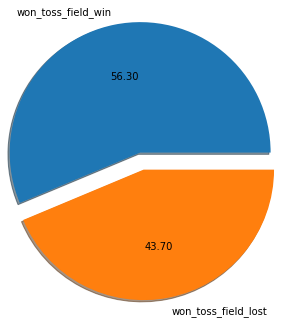

In [ ]:
won_toss_fielding = ['won_toss_field_win', 'won_toss_field_lost']
val=[won_toss_field_win,won_toss_field_lost]

myexplode = [0.2, 0]

plt.pie(val, labels = won_toss_fielding, explode = myexplode, shadow = True,autopct='%.2f', radius=1.5)
#plt.legend(title = "Winning the toss choosed to field",loc="best", fontsize=10)
plt.show()


In [ ]:
# winning the match who won the toss and choosed to field 

winning_field_toss_percentage = 100*(won_toss_field_win/won_toss_field)

# Lossing the match who won the toss and choosed to field
lossing_field_toss_percentage = 100 - winning_field_toss_percentage

In [ ]:
#verifying by percentage and using pie chart value

won_percentage_fielding_value = [winning_field_toss_percentage,lossing_field_toss_percentage]
won_percentage_fielding_value

[56.30434782608695, 43.69565217391305]

### 2.2 - Match Won by winning the toss opt for bat

In [ ]:
#Number of matches won toss and opted for bat
toss_bat=toss_new[toss_new['toss_decision']=='bat']
toss_bat
won_toss_bat = len(toss_bat)
won_toss_bat


292

In [ ]:
#logic for filtering the toss winner with winner of the match who choosed for bat
winners_b=toss_bat[toss_bat['toss_winner']==toss_bat['winner']]
won_toss_bat_win = len(winners_b)
won_toss_bat_win

134

In [ ]:
#winning the toss and lost match by batting
won_toss_bat_lost = won_toss_bat - won_toss_bat_win
won_toss_bat_lost

158

In [ ]:
won_toss_batting = ['won_toss_bat_win', 'won_toss_bat_lost']
won_toss_batting_list=[won_toss_bat_win,won_toss_bat_lost]
won_toss_batting_list

[134, 158]

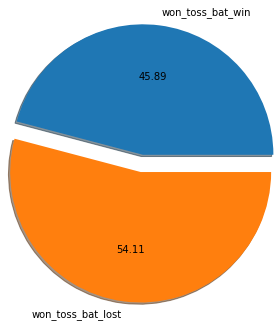

In [ ]:
won_toss_batting_value_np= np.array(won_toss_batting_list)

won_toss_batting = ['won_toss_bat_win', 'won_toss_bat_lost']


myexplode = [0.2, 0]

plt.pie(won_toss_batting_value_np, labels = won_toss_batting, explode = myexplode, shadow = True,autopct='%.2f', radius = 1.5)
#plt.legend(title = "Winning the toss choosed to bat",loc="best", fontsize=10)
plt.show()


In [ ]:
# winning the match who won the toss and choosed to bat

winning_bat_toss_percentage = 100*(won_toss_bat_win/won_toss_bat)
winning_bat_toss_percentage

# Lossing the match who won the toss and choosed to bat
lossing_bat_toss_percentage = 100 - winning_bat_toss_percentage

In [ ]:
#verifying by percentage and using pie chart value
percentage_batting_value = [winning_bat_toss_percentage,lossing_bat_toss_percentage]
percentage_batting_value

[45.89041095890411, 54.10958904109589]